Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [ ]:
# cell for imports. All imports must go here.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [ ]:
titanic_df = pd.read_csv('./train.csv')
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

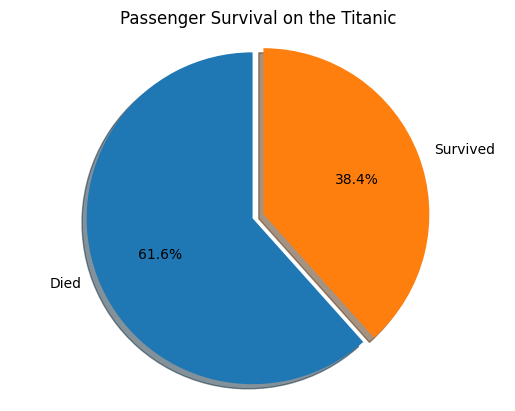

In [ ]:
explode = (0, 0.07)
survived = titanic_df['Survived'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(survived, labels=['Died', 'Survived'], autopct='%1.1f%%', explode=explode,
        shadow=True, startangle=90)
plt.title('Passenger Survival on the Titanic')
ax1.axis('equal')
plt.show()

*прокоментуйте отримані візуалізації

Кругова діаграма ілюструє відсотковий розподіл вцілілих та загиблих пасажирів після катастрофи на "Титаніку". З візуалізації видно, що більшість людей загинуло (близько 62%), а 38% вижили.


3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


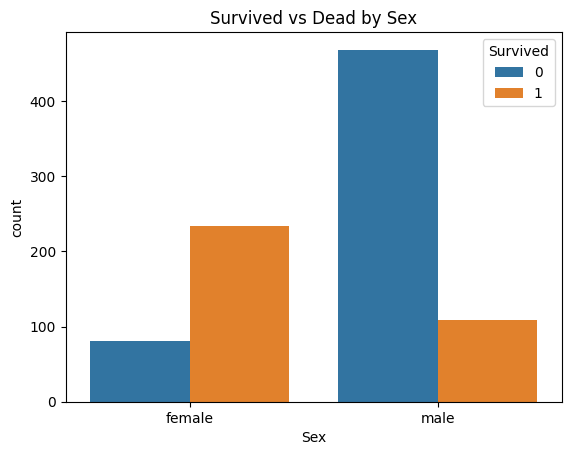

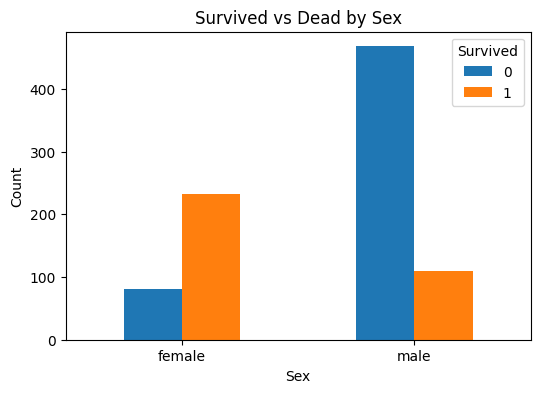

In [ ]:
gender_survival = titanic_df.groupby(['Sex', 'Survived'], as_index=False).size()
gender_survival_unstacked = gender_survival.pivot(index='Sex', columns='Survived', values='size').fillna(0)
gender_survival_unstacked.plot(kind='bar', title='Survived vs Dead by Sex', figsize=(6, 4))
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

*прокоментуйте отримані візуалізації

Стовпчаста діаграма показує кількість пасажирів, які вижили в катастрофі Титаніка, в залежності від статі. З візуалізації видно, що жінок, які вижили, було значно більше, ніж чоловіків.




4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

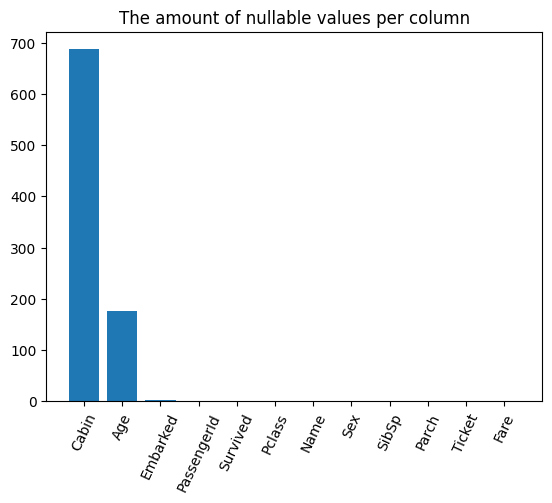

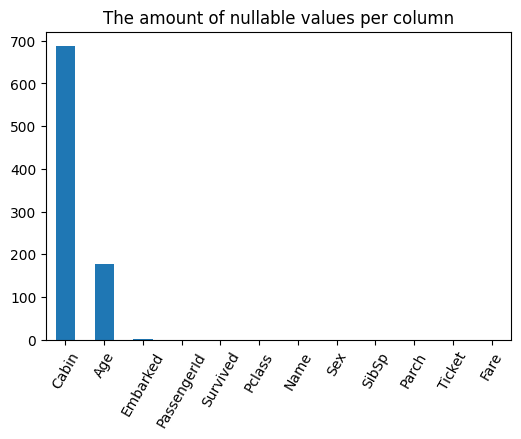

In [ ]:
nullable_values = titanic_df.isnull().sum()
nullable_values.sort_values(ascending=False).plot(kind='bar', title='The amount of nullable values per column', figsize=(6, 4))
plt.xticks(rotation=60)
plt.show()

*прокоментуйте отримані візуалізації

Графік показує кількість пропущених значень у кожному стовпчику набору даних titanic_df.

--Найбільше пропущених значень у змінних 'Cabin' та 'Age'. Інші змінні мають значно менше пропущених значень.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

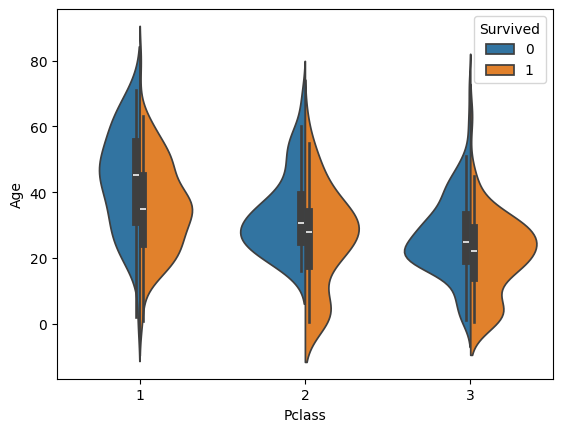

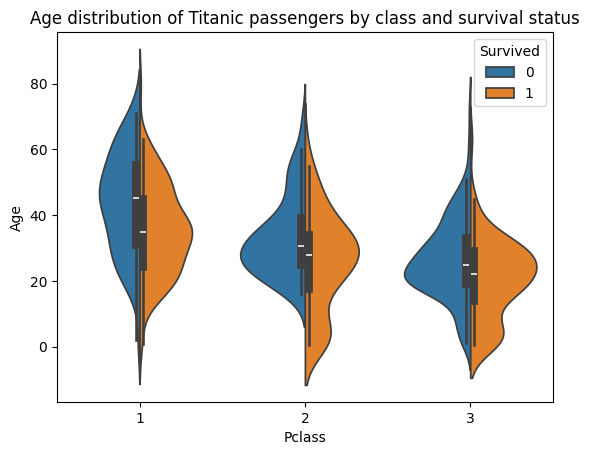

In [ ]:
sns.violinplot(data=titanic_df, x='Pclass', y='Age', hue='Survived', split=True)
plt.title("Age distribution of Titanic passengers by class and survival status", fontsize=12)
plt.show()

*прокоментуйте отримані візуалізації

Ця візуалізація даних являє собою скрипковий графік, який показує розподіл віку пасажирів Титаніка за класом (Pclass) та статусом виживання (Survived). Вона дає уявлення про те, як вік, клас та статус виживання пов'язані між собою.

Висновок по графіку:
Загальний розподіл віку: Більшість пасажирів були у віці від 20 до 40 років.

Вплив класу: Пасажири 1-го класу мали значно більшу частку людей похилого віку, ніж 2-го та 3-го класів.

Вплив виживання:
Пасажири 1-го класу мали значно вищу ймовірність виживання, ніж 2-го та 3-го класів, особливо серед чоловіків. Діти та молоді люди мали значно більші шанси на виживання, ніж люди похилого віку

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


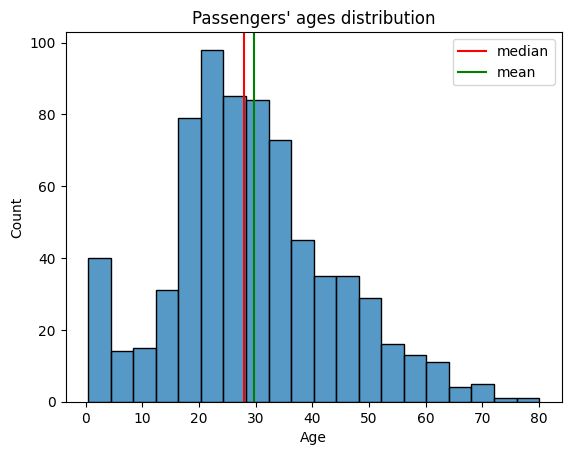

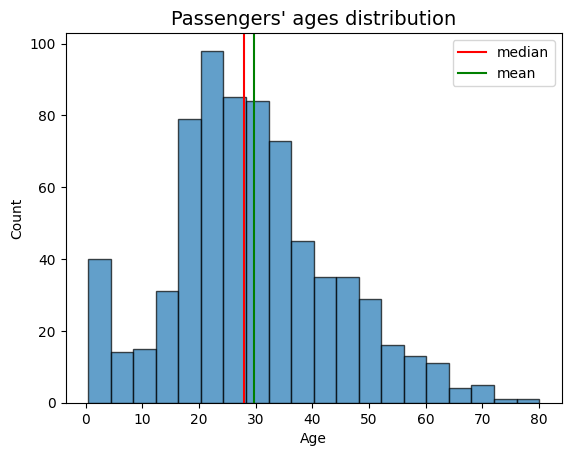

In [ ]:
mean_age = titanic_df['Age'].mean()
median_age = titanic_df['Age'].median()
plt.hist(titanic_df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=median_age, color='red', linestyle='solid', label='median')
plt.axvline(x=mean_age, color='green', linestyle='solid', label='mean')
plt.title("Passengers' ages distribution", fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

*прокоментуйте отримані візуалізації

Гістограма показує, що вік пасажирів на Титаніку не має нормального розподілу. Більше пасажирів було у 20-ти та 30-ти роках, ніж у будь-якій іншій віковій групі. Медіанний вік становить 28 років, а середній - 30 років. Це означає, що на Титаніку було більше молодих пасажирів, ніж старших.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

Як варіюється виживання пасажирів залежно від різних характеристик?

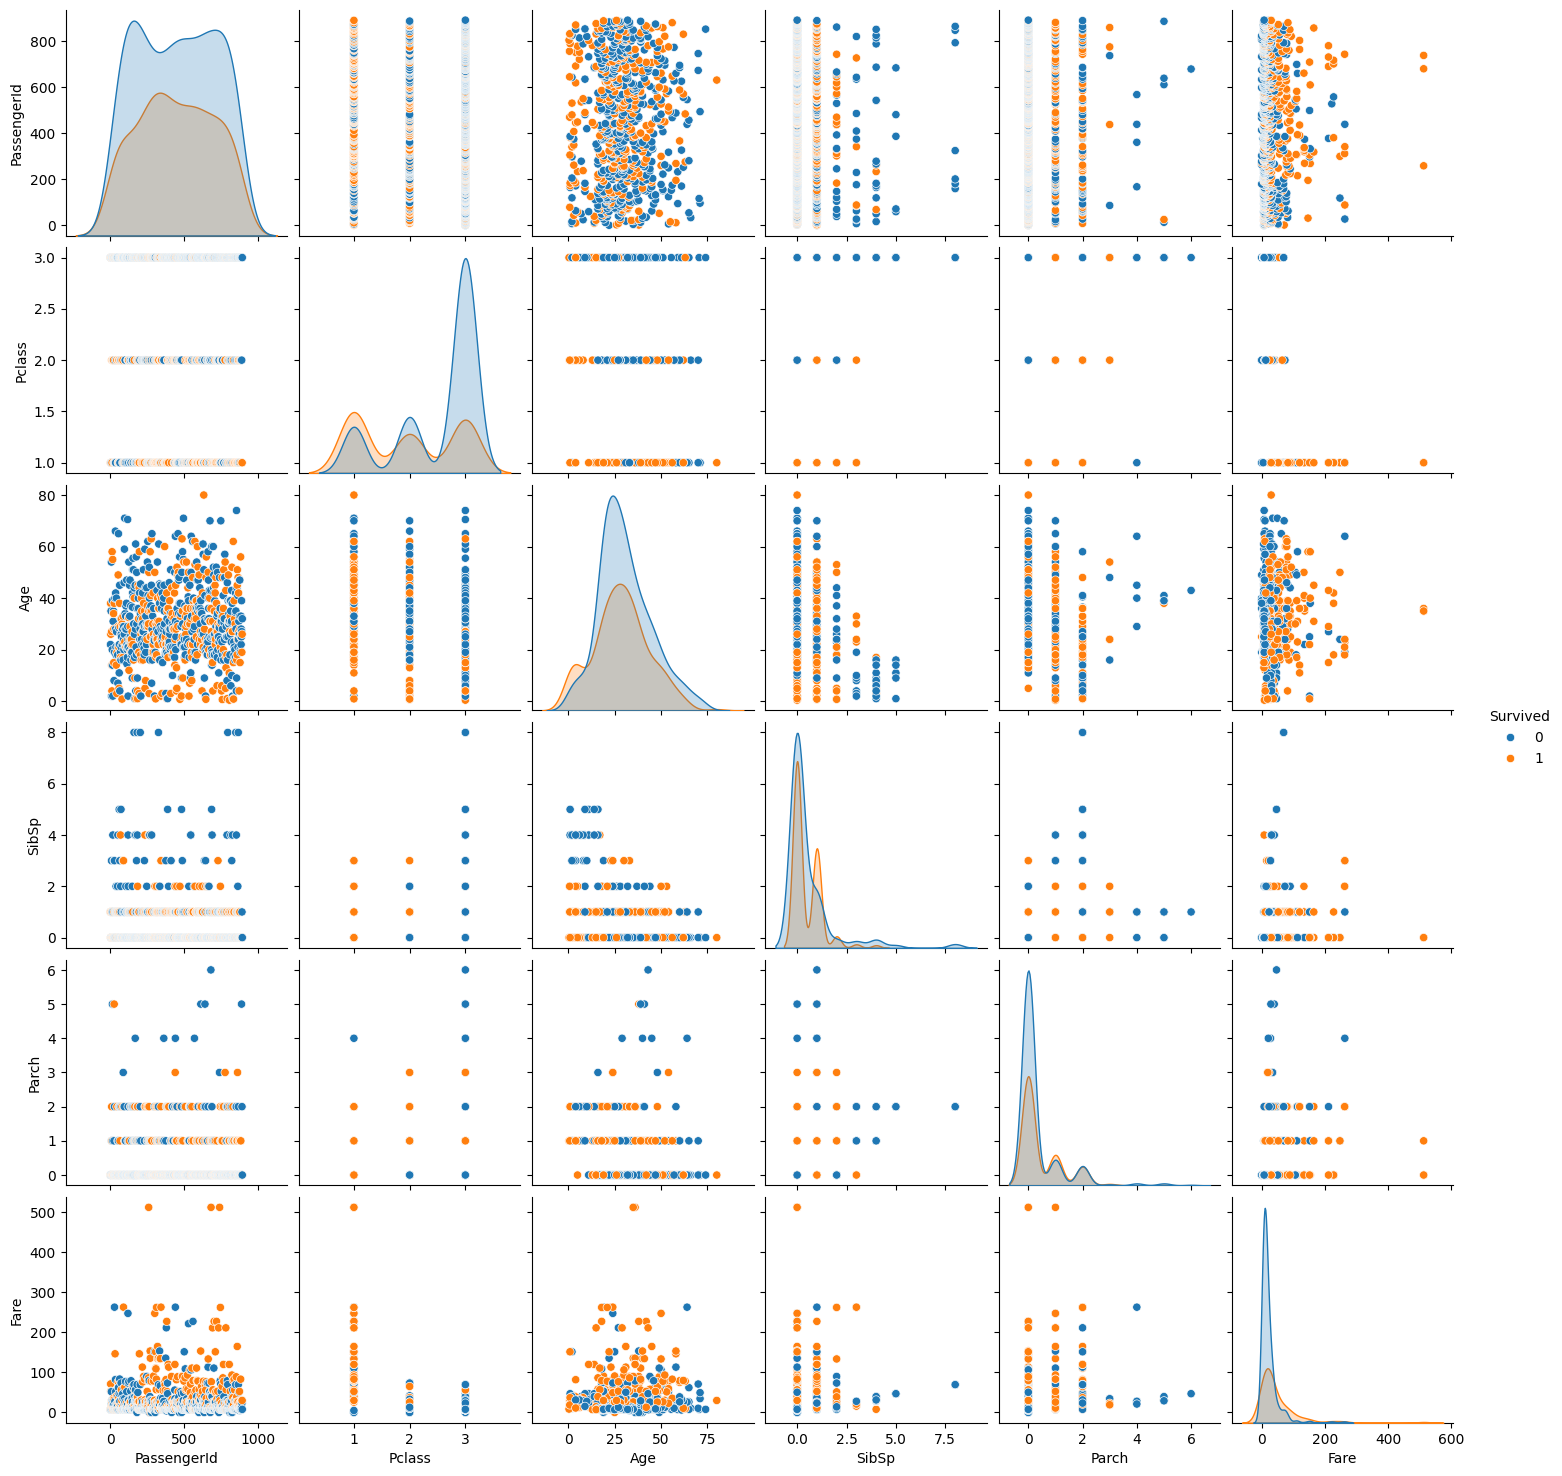

In [ ]:
sns.pairplot(titanic_df, hue="Survived")
plt.show()

*прокоментуйте отримані візуалізації

Отримані візуалізації надають змогу оглянути взаємозв'язки між різними змінними та виживанням пасажирів.

Висновки, які можна зробити на основі візуалізації:

Стать: Жінки мали більші шанси на виживання, ніж чоловіки.

Клас: Пасажири першого класу мали більші шанси на виживання, ніж пасажири другого та третього класів.

Вік: Діти та молоді люди мали більші шанси на виживання, ніж люди похилого віку.

Сімейний стан: Пасажири, які подорожували з сім'ями, мали більші шанси на виживання, ніж ті, хто подорожував самостійно.

Місце на кораблі: Пасажири, які знаходились в носовій частині корабля, мали більші шанси на виживання, ніж ті, хто знаходився в кормовій частині.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

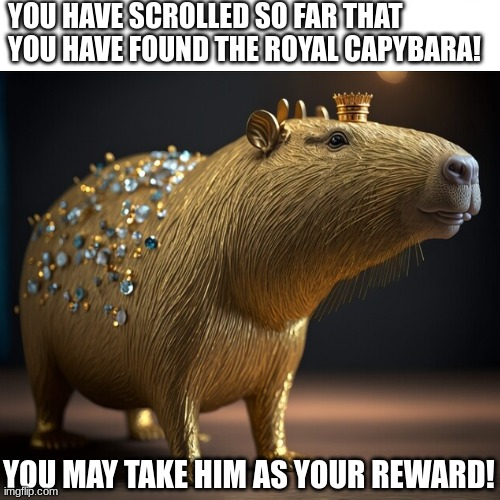